# Clase 9 - Matplotlib

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [10]:
ser = pd.Series([random.randint(0,10) for x in range(0,10)], index=["A","B","C","D","E","F","G","H","I","J"])

In [12]:
ser

A    8
B    0
C    8
D    6
E    6
F    4
G    4
H    2
I    1
J    8
dtype: int64

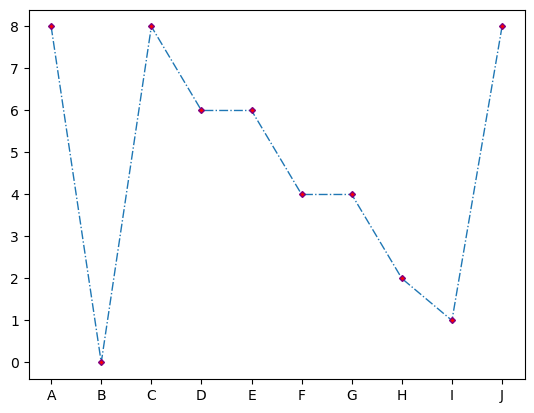

In [16]:
plt.plot(ser, marker="D", markersize=3, markerfacecolor="red", markeredgecolor="purple", markeredgewidth=1, linewidth=1, linestyle="-.")

## Anatomía del Gráfico

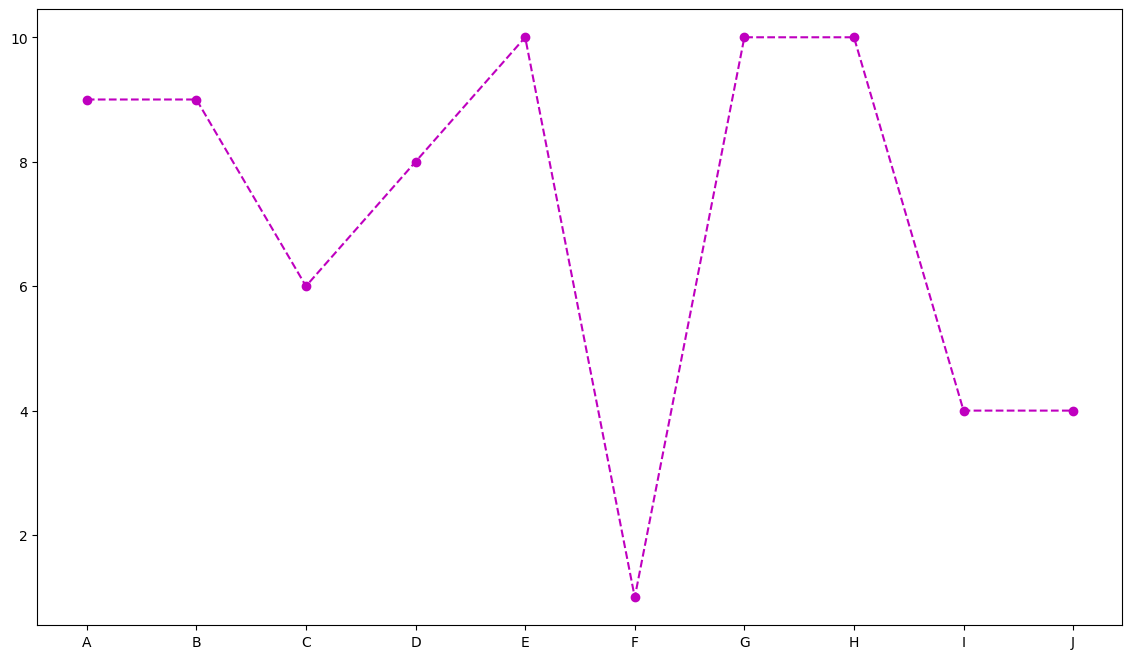

In [27]:
ser = pd.Series([random.randint(0,10) for x in range(0,10)], index=["A","B","C","D","E","F","G","H","I","J"])
plt.figure(figsize=(14, 8))
plt.plot(ser, "o--m")
plt.savefig("anatomia.jpg")

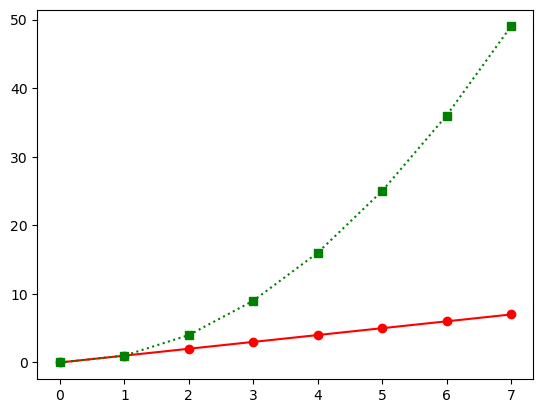

In [31]:
x = np.array([0,1,2,3,4,5,6,7])

plt.plot(x, "o-r")
plt.plot(x**2, "s:g")
#plt.plot(x*3, "D:b")

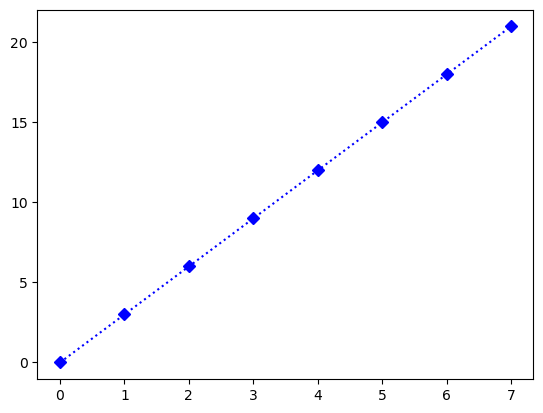

In [33]:
plt.plot(x*3, "D:b")

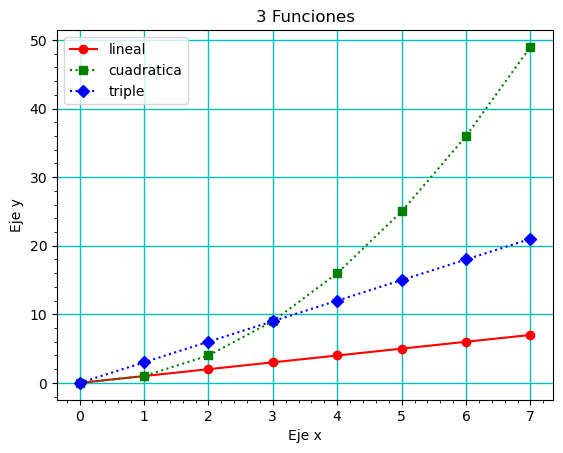

In [35]:
x = np.array([0,1,2,3,4,5,6,7])
plt.plot(x, "o-r", label="lineal")
plt.plot(x**2, "s:g", label="cuadratica")
plt.plot(x*3, "D:b", label="triple")
plt.title("3 Funciones")
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.grid(color='c', linestyle='-', linewidth=1)
plt.minorticks_on()
plt.legend()

## Otros Gráficos

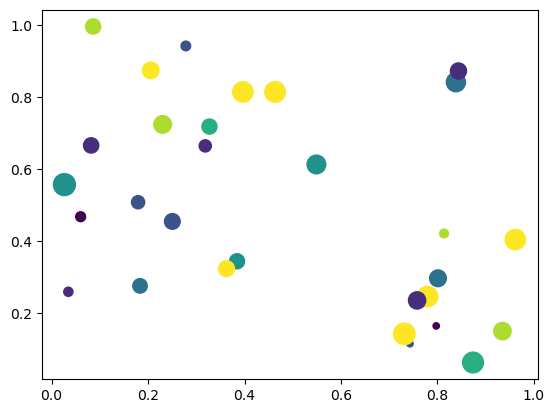

In [38]:
# Scatter - Grafico de puntos
x,y = np.random.random((2,30))
color = np.random.randint(0,9,30)
size = np.random.randint(20,250,30)
plt.scatter(x,y,c=color,s=size) # s= size, c = color

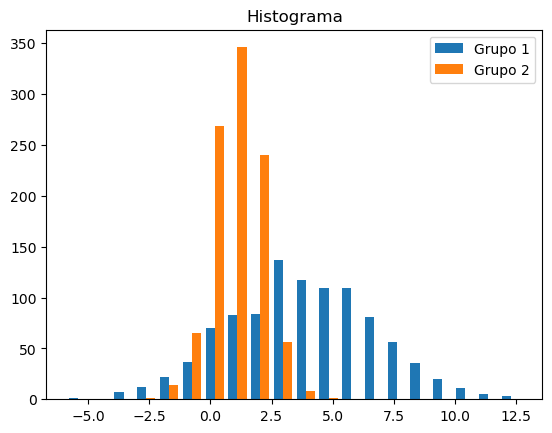

In [40]:
# Histograma - Distribución de numeros, se conforma de barras cuyo alto es la
#              cantidad de datos que estan en el segmento comprendido por la barra

x1 = np.random.normal(4,3,1000)
x2 = np.random.normal(1,1,1000)
plt.hist((x1,x2), bins=20, label=["Grupo 1", "Grupo 2"])
plt.title("Histograma")
plt.legend()

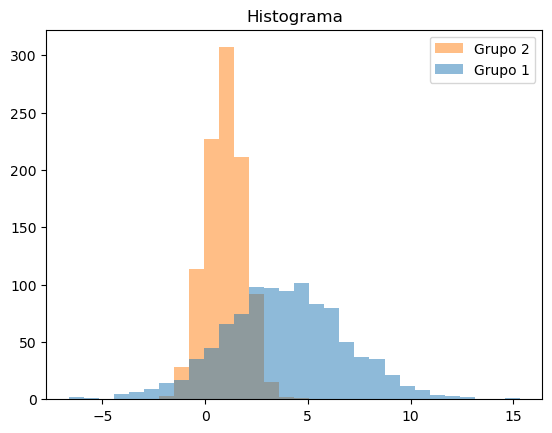

In [46]:
x1 = np.random.normal(4,3,1000)
x2 = np.random.normal(1,1,1000)
plt.hist((x1,x2), bins=30, label=["Grupo 1", "Grupo 2"], histtype="stepfilled", alpha=0.5)
plt.title("Histograma")
plt.legend()

<BarContainer object of 3 artists>

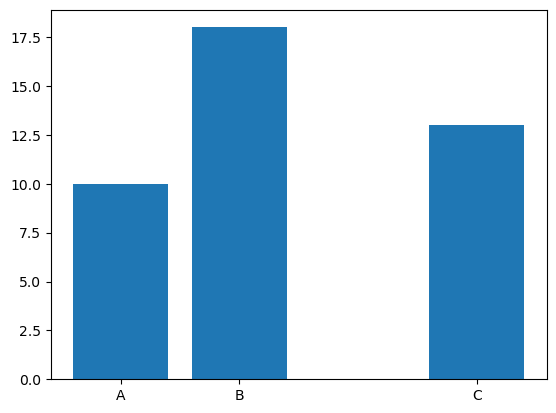

In [48]:
# Graficos de Barras

datos = [10,18,13]
plt.bar([1,2,4],datos, tick_label=["A", "B", "C"])

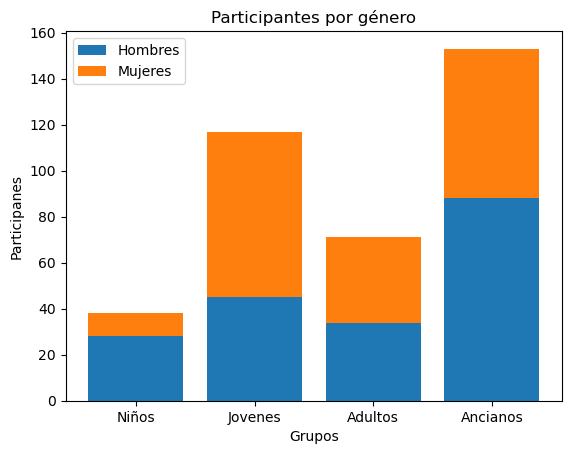

In [50]:
grupos = ['Niños', 'Jovenes', 'Adultos', 'Ancianos']
hombres = [28,45,34,88]
mujeres = [10,72,37,65]

indice = np.arange(len(grupos))

## Se crean las primeras barras
plt.bar(indice, hombres, label='Hombres')

## Se crean las segundas barras y se apilan sobre las primeras
plt.bar(indice, mujeres, label='Mujeres',  bottom=hombres)

plt.xticks(indice, grupos)
plt.ylabel("Participanes")
plt.xlabel("Grupos")
plt.title('Participantes por género')
plt.legend()

plt.show()

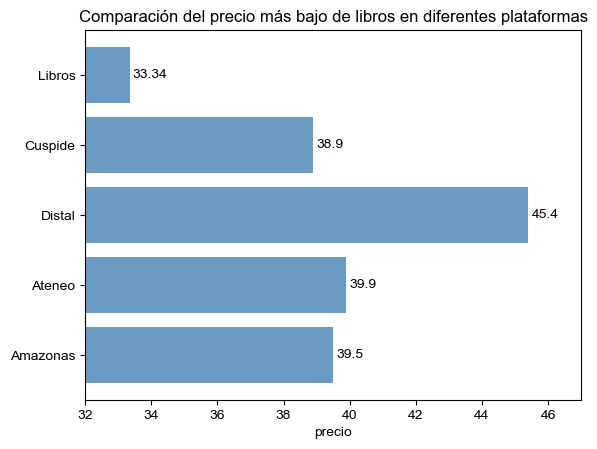

In [52]:
price = [39.5,39.9,45.4,38.9,33.34]

# Definicion de look & feel
plt.rcParams['font.sans-serif'] =[u'Arial']
plt.rcParams['axes.unicode_minus'] = False

# Dibujo
plt.barh(range(5), price, align = 'center',color='steelblue', alpha = 0.8)
# Agregar etiqueta de eje
plt.xlabel('precio')
# Añadir título
plt.title('Comparación del precio más bajo de libros en diferentes plataformas')
# Agregar etiquetas de marca
plt.yticks(range(5),['Amazonas','Ateneo','Distal','Cuspide','Libros'])
# Establecer el rango de escala del eje X
plt.xlim([32,47])

# Agregue etiquetas numéricas a cada gráfico de barras
for x,y in enumerate(price):
    plt.text(y+0.1,x,f'{y}',va='center')
    
# Mostrar gráficos
plt.show()

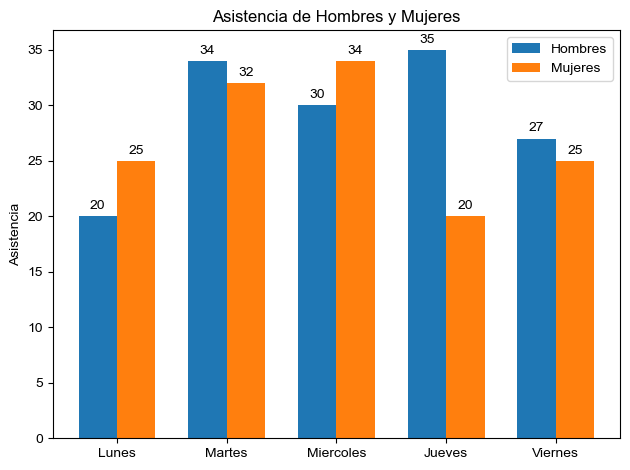

In [54]:
asistencia = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(asistencia))
#tamaño de cada barra
width = 0.35

fig, ax = plt.subplots()

#Generamos las barras para el conjunto de hombres
rects1 = ax.bar(x - width/2, men_means, width, label='Hombres')
#Generamos las barras para el conjunto de mujeres
rects2 = ax.bar(x + width/2, women_means, width, label='Mujeres')

#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Asistencia')
ax.set_title('Asistencia de Hombres y Mujeres')
ax.set_xticks(x)
ax.set_xticklabels(asistencia)
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()

def autolabel(rects):
    """Funcion para agregar una etiqueta con el valor en cada barra"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#Añadimos las etiquetas para cada barra
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
#plt.savefig('doble_barra.png')
#Mostramos la grafica con el metodo show()
plt.show()

<Figure size 1000x600 with 0 Axes>

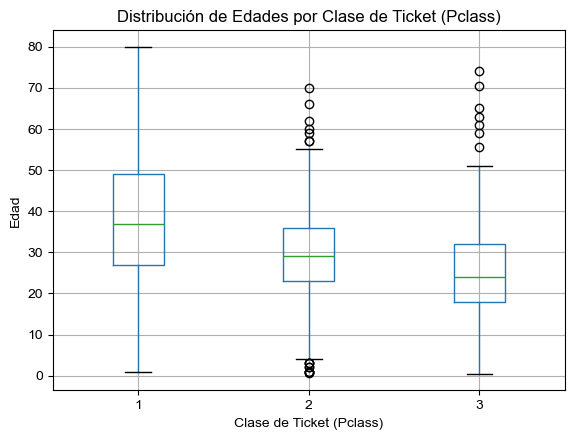

In [56]:
# Boxplot

# Cargar el archivo CSV
df = pd.read_csv('titanic.csv')

# Eliminar filas con valores nulos en la columna 'Age'
df = df.dropna(subset=['Age'])

# Crear un boxplot de la distribución de edades por clase
plt.figure(figsize=(10, 6))
df.boxplot(column='Age', by='Pclass', grid=False, showfliers=True)

# Personalizar el gráfico
plt.title('Distribución de Edades por Clase de Ticket (Pclass)')
plt.suptitle('')  # Elimina el título automático que genera boxplot
plt.xlabel('Clase de Ticket (Pclass)')
plt.ylabel('Edad')
plt.grid(True)

# Mostrar el gráfico
plt.show()


<Axes: >

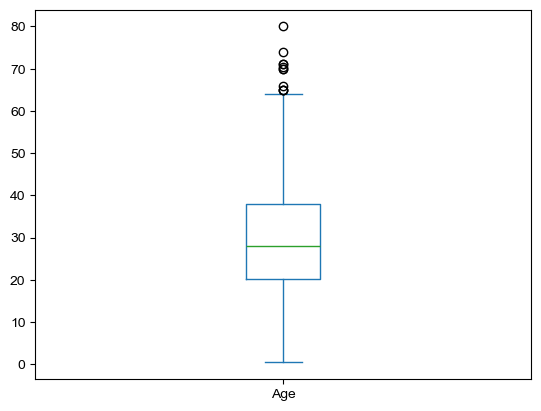

In [58]:
df["Age"].plot(kind="box")

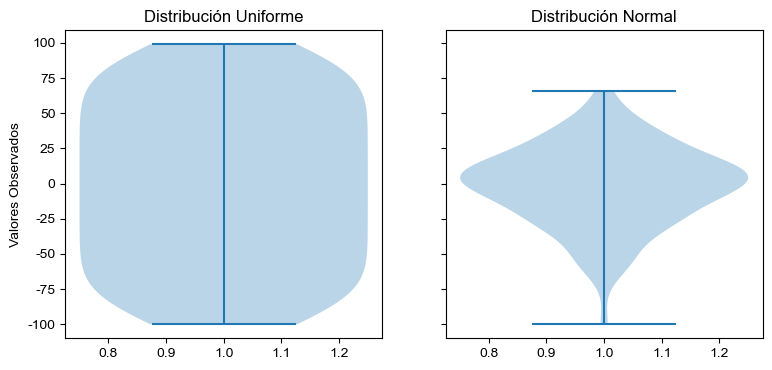

In [60]:
# Creación de un array de valores distribuidos uniformemente
uniform = np.arange(-100, 100)

# Creación de un array de distribución de valores normales
normal = np.random.normal(size = 100)*30

fig, (ax1, ax2) = plt.subplots(nrows = 1,
                               ncols = 2,
                               figsize =(9, 4),
                               sharey = True)

ax1.set_title('Distribución Uniforme')
ax1.set_ylabel('Valores Observados')
ax1.violinplot(uniform)

ax2.set_title('Distribución Normal')
ax2.violinplot(normal)

plt.show()

Text(0.5, 1.0, 'Grafico de Tortas 2')

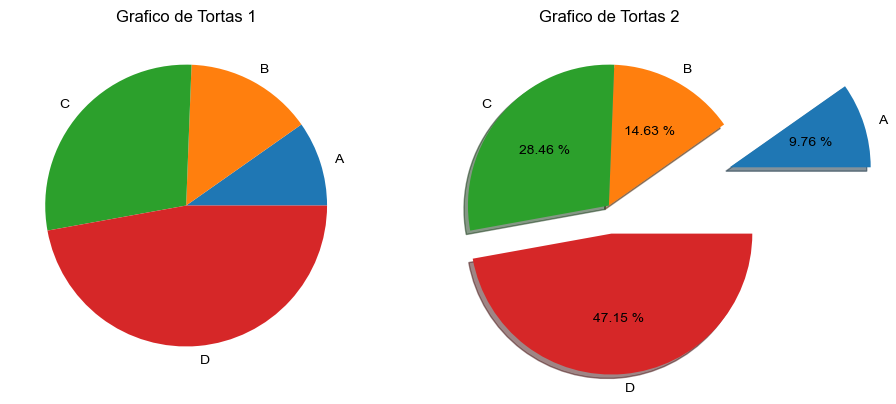

In [70]:
# Grafico de tortas

plt.figure(figsize=(10,8))
ax = plt.subplot(1, 2, 1)
datos = [12,18,35,58]
plt.pie(datos, labels=list("ABCD"))
plt.title("Grafico de Tortas 1")

ax = plt.subplot(1, 2, 2)
plt.pie(datos, labels=list("ABCD"), shadow=True, explode=[0.9,0,0,0.2], autopct="%0.2f %%")

plt.title("Grafico de Tortas 2")

## Ejercicio 

Evolución del cambio del dolar en Argentina

In [73]:
df = pd.read_csv("ECD.csv", delimiter=";")

In [75]:
df

,Fecha,Tipo de cambio
0,2/1/2020,"59,8518"
1,3/1/2020,"59,8335"
2,6/1/2020,"59,819"
3,7/1/2020,"59,8195"
4,8/1/2020,"59,8177"
...,...,...
411,14/9/2021,"98,22"
412,15/9/2021,"98,245"
413,16/9/2021,"98,3117"
414,17/9/2021,"98,3483"


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fecha           416 non-null    object
 1   Tipo de cambio  416 non-null    object
dtypes: object(2)
memory usage: 6.6+ KB


In [79]:
# Cambiar los object al tipo de datos que corresponda

df["Fecha"] = pd.to_datetime(df["Fecha"], format="%d/%m/%Y")

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha           416 non-null    datetime64[ns]
 1   Tipo de cambio  416 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 6.6+ KB


In [85]:
df["Tipo de cambio"] = df["Tipo de cambio"].str.replace(",", ".")

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha           416 non-null    datetime64[ns]
 1   Tipo de cambio  416 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 6.6+ KB


In [89]:
df

,Fecha,Tipo de cambio
0,2020-01-02,59.8518
1,2020-01-03,59.8335
2,2020-01-06,59.819
3,2020-01-07,59.8195
4,2020-01-08,59.8177
...,...,...
411,2021-09-14,98.22
412,2021-09-15,98.245
413,2021-09-16,98.3117
414,2021-09-17,98.3483


In [91]:
df["Tipo de cambio"] = df["Tipo de cambio"].astype(float)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha           416 non-null    datetime64[ns]
 1   Tipo de cambio  416 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.6 KB


### Ejercicio 

- Plotear la evolucion del tipo de cambio del dolar
- Definir una línea objetivo en $ 90

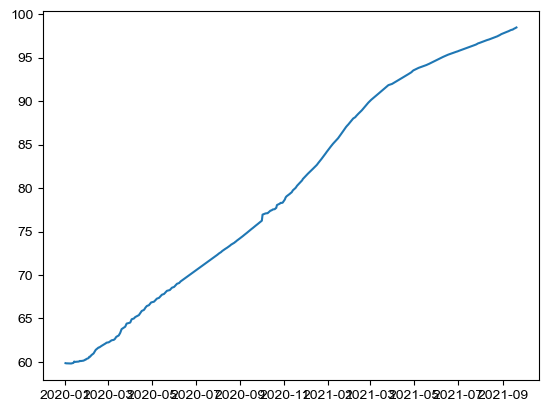

In [99]:
plt.plot(df["Fecha"], df["Tipo de cambio"])

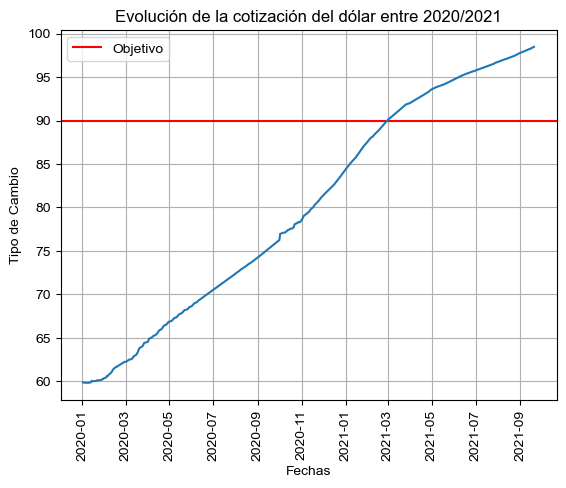

In [101]:
plt.grid()
plt.xlabel("Fechas")
plt.ylabel("Tipo de Cambio")
plt.title("Evolución de la cotización del dólar entre 2020/2021")
plt.axhline(y=90, label="Objetivo", color="r")
plt.legend()
plt.xticks(rotation="vertical")
plt.plot(df["Fecha"], df["Tipo de cambio"])